In [12]:
import json
from pytube import YouTube, Playlist
#from moviepy.editor import *
#import pickle
#import time
import os

#from pytube.exceptions import VideoUnavailable, VideoPrivate, MaxRetriesExceeded
#from urllib.error import URLError
import matplotlib.pyplot as plt
#import pickle

In [13]:
def analysis_data(data):

    link_first = 'http://youtube.com/watch?v='
    data_list = dict()

    private = 0
    urlr = 0
    unaviabl = 0

    for i in range(0,len(data)): 

        #print(len(data)-i)

        ind = list(data.keys())[i]
#        yt_link = data[ind]['url']
        #duration = int(data[ind]['duration'])
        #start = int(data[ind]['annotations']['segment'][0])
        #end = int(data[ind]['annotations']['segment'][1])
        label = data[ind]['annotations']['label']
#        name_vid = 'vid' + str(i)

        #print(yt_link+'?t='+str(start))

#        try:
#            yt = YouTube(yt_link)
#            yt.check_availability()
#        except VideoUnavailable:
#            unaviabl = unaviabl +1
#            pass  # Skip videos that can't be loaded
#        except VideoPrivate:
#            private = private + 1
#            pass
#        except URLError:
#            urlr = urlr + 1
#            pass
#        else:
        if label in data_list:
            data_list[label] = data_list[label] +1
        else:
            data_list[label] = 1

    return data_list
#print(private)
#print(unaviabl)
#print(urlr)

def combine_dicts (dictA,dictB):
    for key in dictB:
        if key in dictA:
            dictB[key] = dictB[key] + dictA[key]
        else:
            pass
    e = {**dictA, **dictB}
    return e

def num_dict (dictA):
    sum = 0
    for key in dictA:
        sum = sum + dictA[key]
    return sum

In [14]:
#Trenovaci mnozina dat
path = 'kinetics400/train.json'
f = open('kinetics400/train.json')
data = json.load(f)

data_list_train= analysis_data(data)

#print(data_list_train)

#with open('train.pickle', 'wb') as handle:
#    pickle.dump(data_list_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

#Validacni mnozina dat
path = 'kinetics400/validate.json'
f = open('kinetics400/validate.json')
data = json.load(f)

data_list_validate= analysis_data(data)
#print(str(private_validate) + ' ' + str(urlr_validate) + ' ' + str(unaviabl_validate))

#with open('validate.pickle', 'wb') as handle:
#    pickle.dump(data_list_validate, handle, protocol=pickle.HIGHEST_PROTOCOL)

#Testovaci mnozina dat
path = 'kinetics400/test.json'
f = open('kinetics400/test.json')
data = json.load(f)

data_list_test = analysis_data(data)
#print(str(private_test) + ' ' + str(urlr_test) + ' ' + str(unaviabl_test))

#with open('test.pickle', 'wb') as handle:
#    pickle.dump(data_list_test, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    

train_val = combine_dicts (data_list_train,data_list_validate)
train_val_test = combine_dicts (train_val,data_list_test)



In [22]:
#print('Celkem dostupných videí: ' + str(num_dict(train_val_test)))
#print('Počet nedostupných videí: '+ str(err))

#print('-----')
print('Trénovacích videí: '+str(num_dict(data_list_train)))
print('Validačních videí: '+str(abs(num_dict(data_list_train)-num_dict(data_list_validate))))
print('Testovacích videí: '+str(abs(num_dict(data_list_validate)-num_dict(data_list_test))))


Trénovacích videí: 219782
Validačních videí: 18035
Testovacích videí: 35357


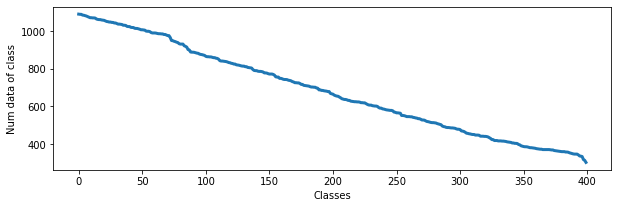

In [16]:
dict_m = sorted(train_val_test.items(), key=lambda x: x[1], reverse=True)

#print(dict_m[1][1])

numbers = []
for i in range(0,len(dict_m)):
    numbers.append(dict_m[i][1])

#print(numbers)
plt.plot(numbers, linewidth=3)
plt.ylabel('Num data of class')
plt.xlabel('Classes')

plt.savefig('grr_1.jpg')
plt.savefig('gr_1.eps')

plt.show()

#


snowkiting --> 1090
blowing out candles --> 1089
tobogganing --> 1089
canoeing or kayaking --> 1085
playing harp --> 1084


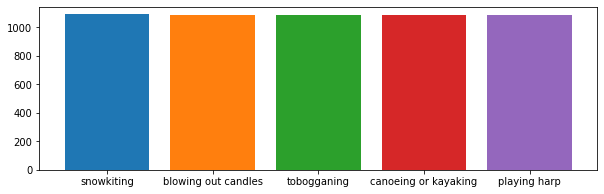

In [25]:
names=[]
size = 5
for i in range(0,size):
    names.append(dict_m[i][0])
    plt.bar(i,dict_m[i][1],tick_label=dict_m[i][0])
    print( dict_m[i][0] + ' --> ' + str(dict_m[i][1]))
    
plt.xticks(range(0,size),names)
plt.savefig('train.png')
plt.rcParams["figure.figsize"] = (10,3)

plt.savefig('grr_2.jpg')
plt.savefig('gr_2.eps')

plt.show()



In [27]:
size = 5
for i in range(len(dict_m)-size,len(dict_m)):
    print( dict_m[i][0] + ' --> ' + str(dict_m[i][1]))

sniffing --> 336
cracking neck --> 334
taking a shower --> 318
shooting goal (soccer) --> 314
clay pottery making --> 303
